In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

◼️1-1. センサは下図のような配置で前腕にしっかりと固着させる。
<center><figure>
    <img src="DSC_0628.JPG" width="300">
    <figcaption>図１．センサの取り付け</figcaption>
</figure></center>  
その後，上腕を鉛直に前腕と手を水平に（肘をほぼ直角に）保ちながら，固定した物体（例えば机の下部分）を全力で上に押すという状態を約３分間続ける。

◼️1-2. 計測データをデータフレーム`df`に読み込む：

In [2]:
df = pd.read_csv('0711TSND121-14011733_2019-07-11_163719.055.csv',
                 names=['item', 'time', 'a_x', 'a_y', 'a_z', 'u_x', 'u_y','u_z'])

In [3]:
df.head()

,item,time,a_x,a_y,a_z,u_x,u_y,u_z
0,ags,59839169,328,-10364,-433,131,255,15
1,ags,59839170,365,-10398,-411,143,249,27
2,ags,59839171,360,-10364,-543,143,242,27
3,ags,59839172,377,-10381,-538,156,255,15
4,ags,59839173,377,-10373,-436,156,261,15


In [4]:
df.tail()

,item,time,a_x,a_y,a_z,u_x,u_y,u_z
202906,ags,60042075,1493,-10249,-326,545,-805,-309
202907,ags,60042076,1510,-10232,-365,539,-830,-309
202908,ags,60042077,1512,-10276,-348,539,-866,-315
202909,ags,60042078,1527,-10332,-324,545,-885,-339
202910,ags,60042079,1537,-10256,-250,539,-897,-345


◼️1-3. 各データの長さ（要素数）は次の通り：

In [5]:
length_of_data = len(df)
print(length_of_data)

202911


◽︎1-3-1 分秒にして：

In [6]:
print(f'{int(length_of_data/1000//60)}分{(length_of_data/1000)%60}秒')

3分22.911秒


◼️1-4. 角速度の各成分を取り出して1D-numpy配列にしておく。ただし，単位を$\mathrm{G}(=9.806\mathrm{m/s^2})$にするため，各配列を10000で割っておく：

In [7]:
a_x = np.array(df['a_x'])/10
a_y = np.array(df['a_y'])/10
a_z = np.array(df['a_z'])/10

> センサで計測された加速度単位は$10^{-1}\mathrm{mG}=\frac{1}{10000}\mathrm{G}$であることに注意。

◼️1-5. 加速度の各成分の時系列グラフ：

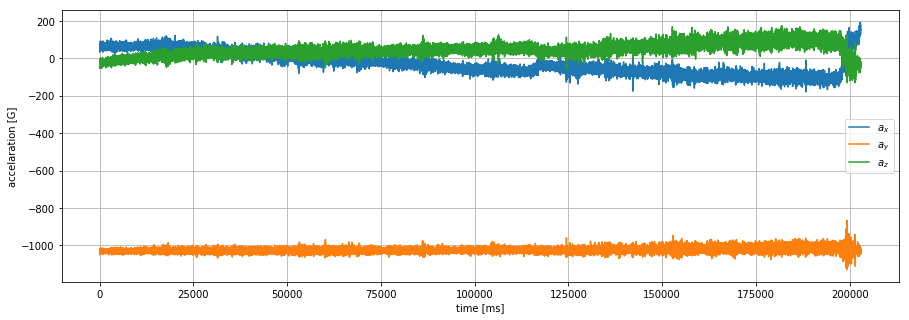

In [8]:
plt.figure(figsize=(15,5))
plt.plot(a_x)
plt.plot(a_y)
plt.plot(a_z)
plt.xlabel('time [ms]')
plt.ylabel('accelaration [G]')
plt.legend(['$a_x$','$a_y$','$a_z$'])
plt.grid()

> 図１のように，y軸がほぼ鉛直下を向いているので，`a_y`が`-1[G]`付近で微小振動をしていることがわかる。残りの成分は`0[G]`付近で微小振動している。

◼️2-1. 

In [9]:
np.array([np.arange(20), 2**np.arange(20)]).T

array([[     0,      1],
       [     1,      2],
       [     2,      4],
       [     3,      8],
       [     4,     16],
       [     5,     32],
       [     6,     64],
       [     7,    128],
       [     8,    256],
       [     9,    512],
       [    10,   1024],
       [    11,   2048],
       [    12,   4096],
       [    13,   8192],
       [    14,  16384],
       [    15,  32768],
       [    16,  65536],
       [    17, 131072],
       [    18, 262144],
       [    19, 524288]])

In [10]:
def hz_vector(arr):
    return 1000 * np.arange(l)/len(arr)

In [11]:
2**(len(format(60000, 'b')))

65536

In [12]:
l = len(a_x)
lis = []
for i in range(0, l, 10000):
    if i+2**15 > l:
        break
    lis.append([i, i+2**15])
print(lis)

[[0, 32768], [10000, 42768], [20000, 52768], [30000, 62768], [40000, 72768], [50000, 82768], [60000, 92768], [70000, 102768], [80000, 112768], [90000, 122768], [100000, 132768], [110000, 142768], [120000, 152768], [130000, 162768], [140000, 172768], [150000, 182768], [160000, 192768], [170000, 202768]]


In [14]:
hz_vector(a_y[50:10000])

array([0.00000000e+00, 1.00502513e-01, 2.01005025e-01, ...,
       2.03927638e+04, 2.03928643e+04, 2.03929648e+04])

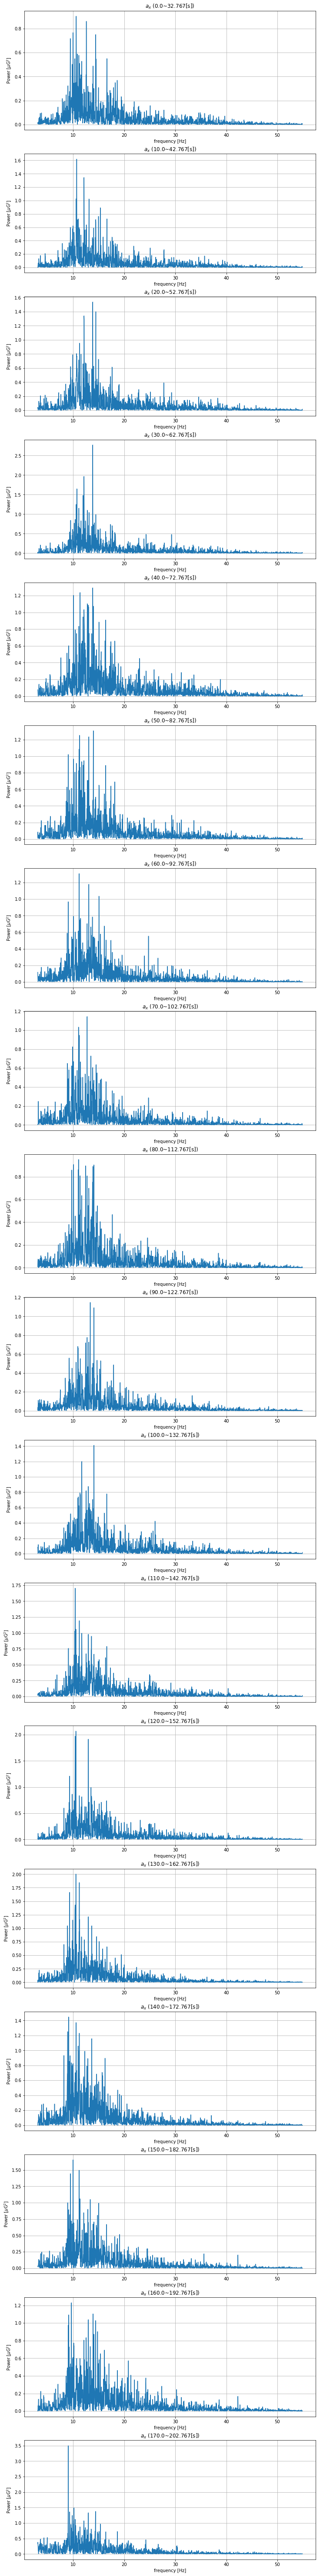

In [15]:
j = 1
plt.figure(figsize=(12,6*18))
for i in lis:
    F_a_ = np.fft.fft(a_x[i[0]:i[1]])/(i[1]-i[0])
    plt.subplot(18, 1, j)
    plt.plot(hz_vector(F_a_)[100:1800], abs(F_a_)[100:1800]**2)
    #plt.ylim([0, 2000])
    plt.title(f'$a_x$ ({i[0]/1000}~{(i[1]-1)/1000}[s])')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power [$\mu \mathrm{G}^2$]')
    plt.grid()
    #plt.show()
    j += 1

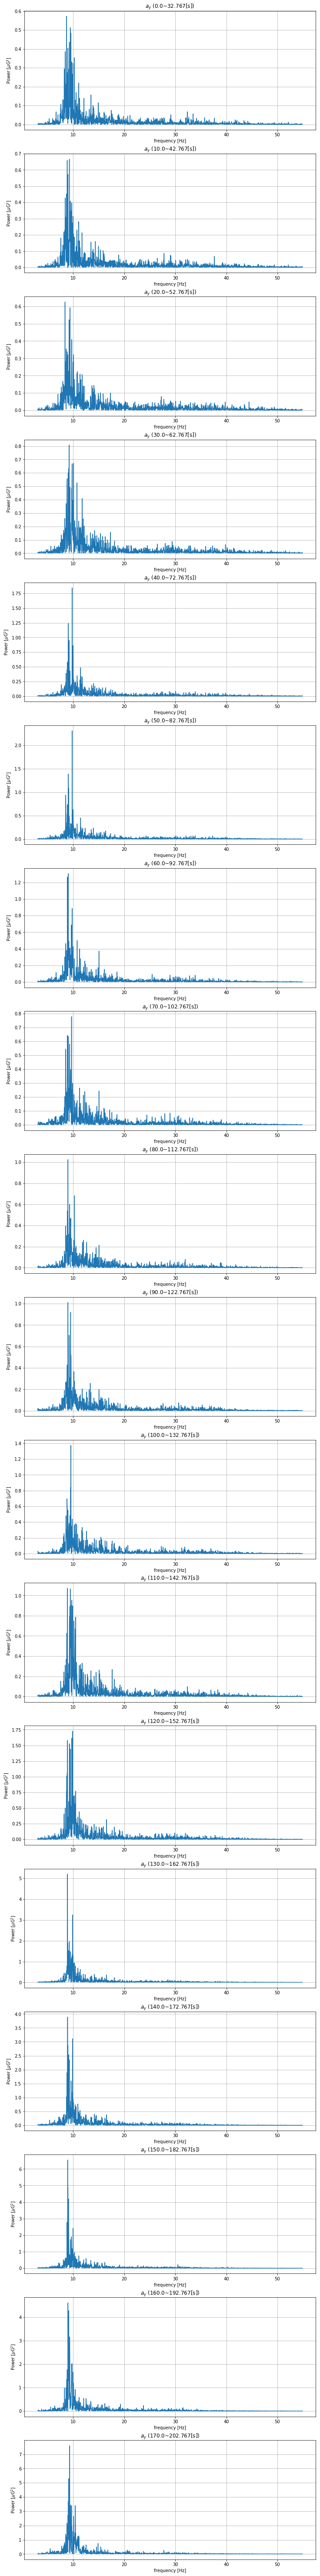

In [17]:
j = 1
plt.figure(figsize=(12,6*18))
for i in lis:
    F_a_ = np.fft.fft(a_y[i[0]:i[1]])/(i[1]-i[0])
    plt.subplot(18, 1, j)
    plt.plot(hz_vector(F_a_)[100:1800], abs(F_a_)[100:1800]**2)
    #plt.ylim([0, 2000])
    plt.title(f'$a_y$ ({i[0]/1000}~{(i[1]-1)/1000}[s])')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power [$\mu \mathrm{G}^2$]')
    plt.grid()
    #plt.show()
    j += 1

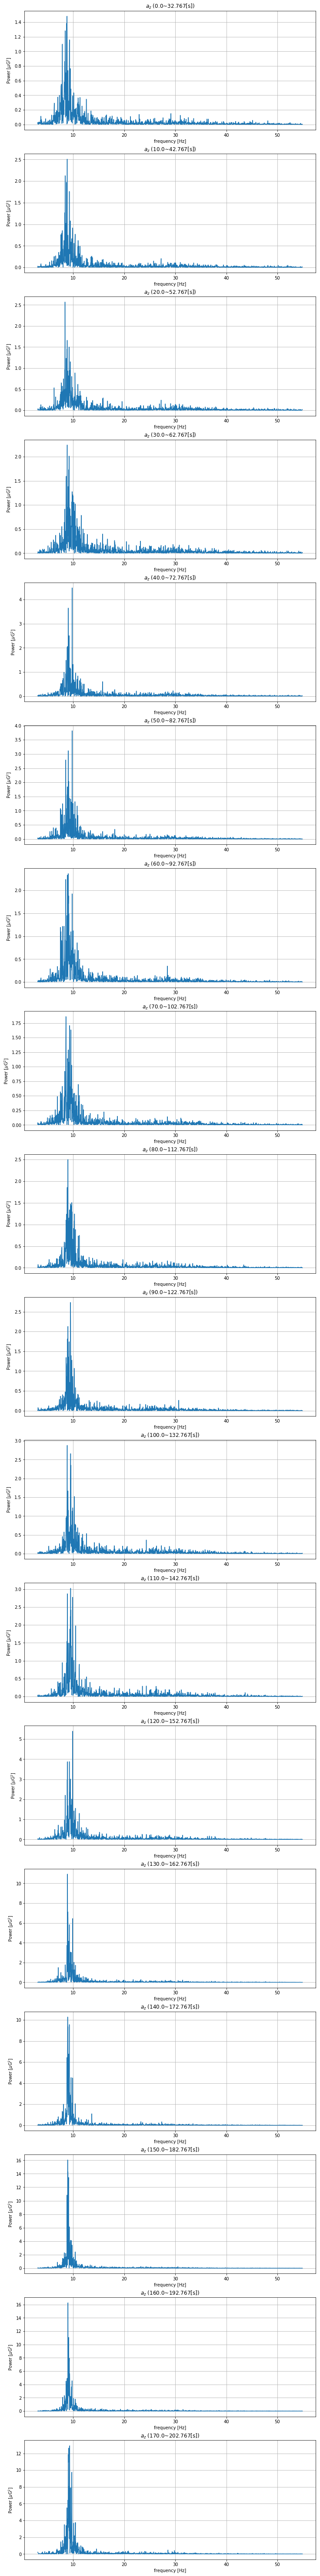

In [18]:
j = 1
plt.figure(figsize=(12,6*18))
for i in lis:
    F_a_ = np.fft.fft(a_z[i[0]:i[1]])/(i[1]-i[0])
    plt.subplot(18, 1, j)
    plt.plot(hz_vector(F_a_)[100:1800], abs(F_a_)[100:1800]**2)
    #plt.ylim([0, 2000])
    plt.title(f'$a_z$ ({i[0]/1000}~{(i[1]-1)/1000}[s])')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Power [$\mu \mathrm{G}^2$]')
    plt.grid()
    #plt.show()
    j += 1

In [119]:
hz_vector(F_a_y)

array([0.00000000e+00, 7.62939453e-03, 1.52587891e-02, ...,
       9.99977112e+02, 9.99984741e+02, 9.99992371e+02])

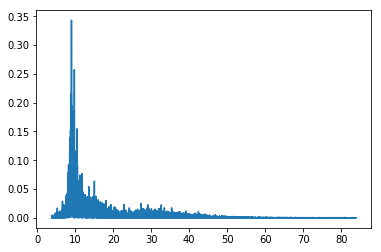

In [120]:
plt.plot(hz_vector(F_a_y)[500:11000], np.abs(F_a_y[500:11000])**2)

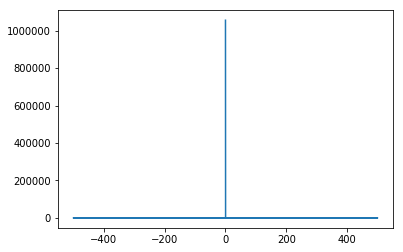

In [212]:
plt.plot(np.fft.fftfreq(2**17, d=0.001), np.abs(F_a_y)**2)

In [213]:
np.fft.fftfreq(2**17, d=0.001)

array([ 0.        ,  0.00762939,  0.01525879, ..., -0.02288818,
       -0.01525879, -0.00762939])

In [121]:
hz_vector(F_a_y)[500+np.where(np.abs(F_a_y[500:11000]**2)==np.max(np.abs(F_a_y[500:11000]**2)))[0][0]]

9.02557373046875

In [122]:
F_a_z = np.fft.fft(arr2power(a_z))/len(arr2power(a_z))

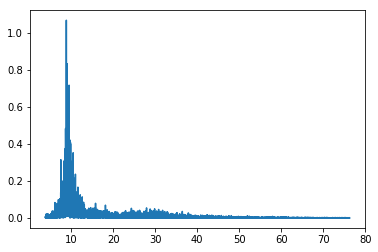

In [133]:
plt.plot(hz_vector(F_a_z)[500:10000], np.abs(F_a_z[500:10000])**2)

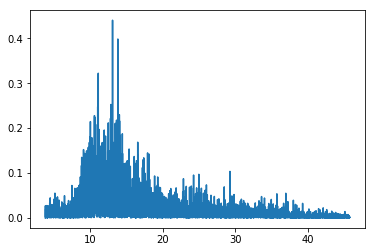

In [134]:
plt.plot(hz_vector(F_a_x)[500:6000], np.abs(F_a_x[500:6000])**2)

In [82]:
c = list(zip(range(0, length_of_data, 10000), range(2**15, length_of_data, 10000)))

In [83]:
c

[(0, 32768),
 (10000, 42768),
 (20000, 52768),
 (30000, 62768),
 (40000, 72768),
 (50000, 82768),
 (60000, 92768),
 (70000, 102768),
 (80000, 112768),
 (90000, 122768),
 (100000, 132768),
 (110000, 142768),
 (120000, 152768),
 (130000, 162768),
 (140000, 172768),
 (150000, 182768),
 (160000, 192768),
 (170000, 202768)]

In [84]:
np.arange(c[0][0], c[0][1])

array([    0,     1,     2, ..., 32765, 32766, 32767])

In [142]:
aax = np.fft.fft(a_x[:32])

In [143]:
print(aax)

[1439.5         +0.j           48.81061001 +97.03231123j
   -8.13086288+100.41509178j  -35.97057095 +39.33634226j
  -25.70208153 +41.67091988j  -14.1091055  +24.80989633j
   13.03405687 +13.66994421j  -39.70709597 +16.87951382j
   -3.         +14.3j         -24.841133   +13.85427542j
  -21.6843094  +12.09378987j  -12.25043329  +3.09564488j
  -23.29791847  +6.27091988j   -9.91740828 -15.92046323j
  -10.41888459  +7.23893744j  -15.21486303  +3.6645188j
  -25.1         +0.j          -15.21486303  -3.6645188j
  -10.41888459  -7.23893744j   -9.91740828 +15.92046323j
  -23.29791847  -6.27091988j  -12.25043329  -3.09564488j
  -21.6843094  -12.09378987j  -24.841133   -13.85427542j
   -3.         -14.3j         -39.70709597 -16.87951382j
   13.03405687 -13.66994421j  -14.1091055  -24.80989633j
  -25.70208153 -41.67091988j  -35.97057095 -39.33634226j
   -8.13086288-100.41509178j   48.81061001 -97.03231123j]


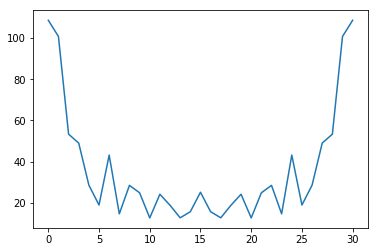

In [144]:
plt.plot(np.abs(aax[1:]))

In [162]:
np.arange(0, 202911, 10000)

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000, 200000])

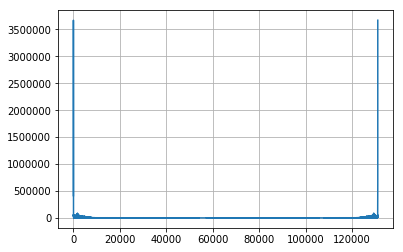

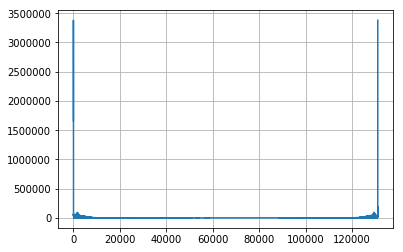

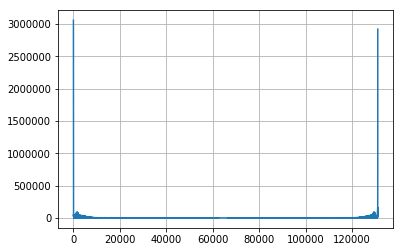

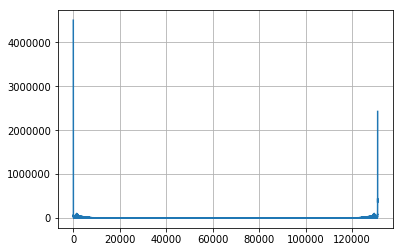

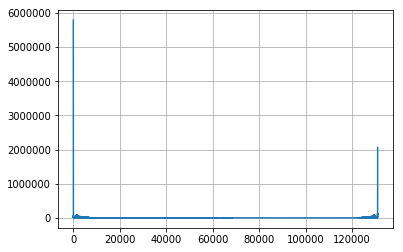

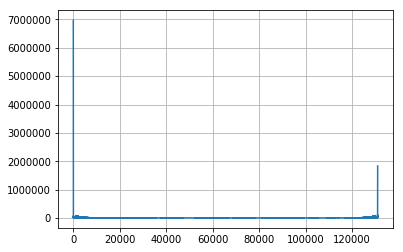

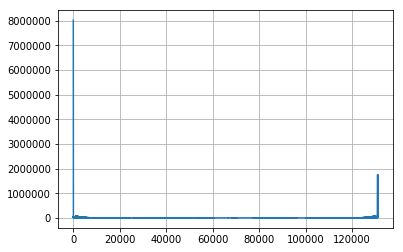

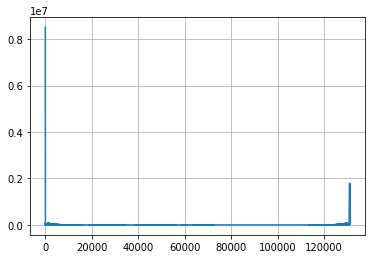

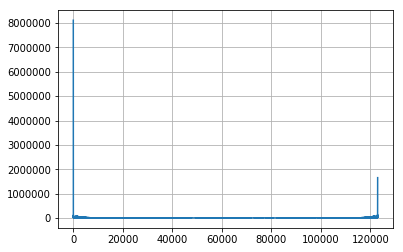

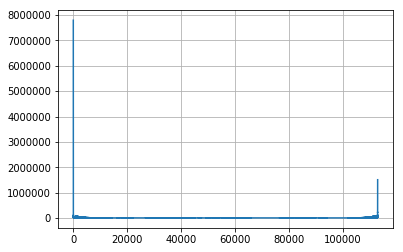

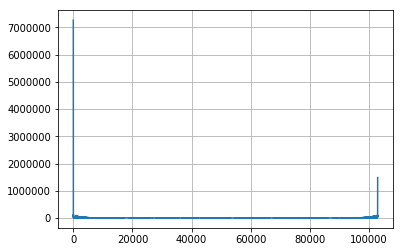

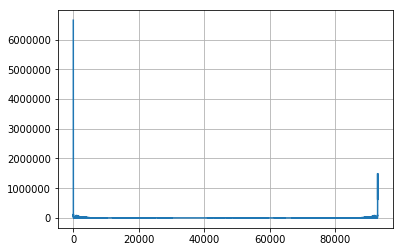

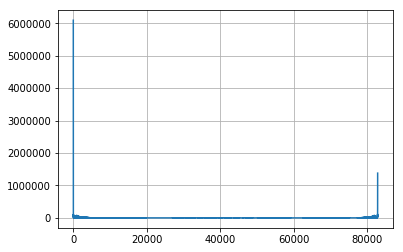

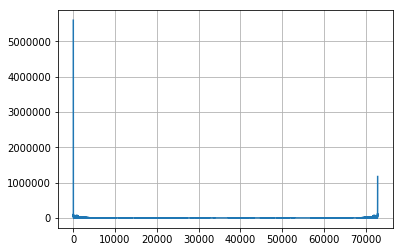

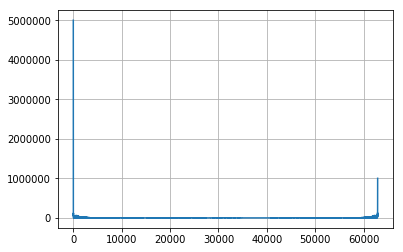

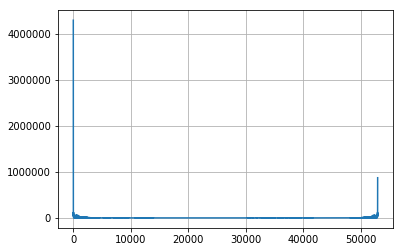

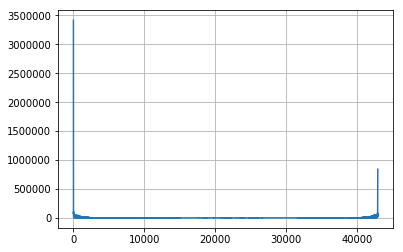

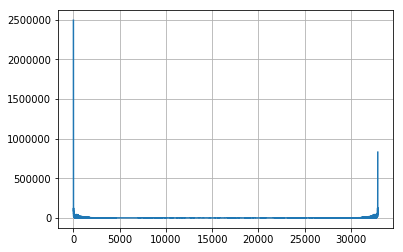

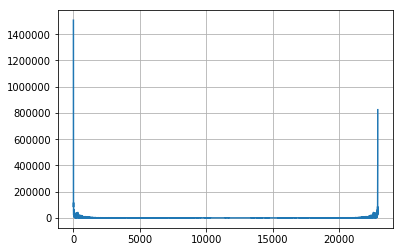

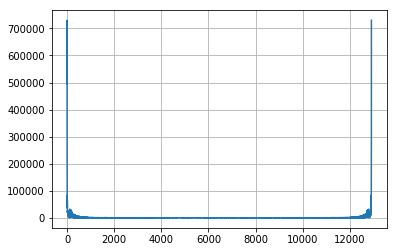

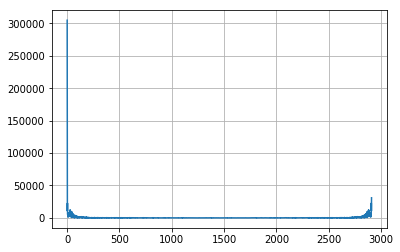

In [174]:
for p in np.arange(0, len(a_x), 10000):
    A_x = np.fft.fft(a_x[p : p+2**17])
    plt.plot(np.abs(A_x))
    plt.grid()
    plt.show()

In [176]:
len(A_x)

2911

In [177]:
np.arange(0, len(a_x), 10000)

array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
        80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
       160000, 170000, 180000, 190000, 200000])

In [195]:
list(range(2**15, len(a_x), 10000))

[32768,
 42768,
 52768,
 62768,
 72768,
 82768,
 92768,
 102768,
 112768,
 122768,
 132768,
 142768,
 152768,
 162768,
 172768,
 182768,
 192768,
 202768]

In [194]:
list(range(0, len(a_x)-2**15, 10000))

[0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 110000,
 120000,
 130000,
 140000,
 150000,
 160000,
 170000]

In [196]:
np.fft.fft?

Signature: np.fft.fft(a, n=None, axis=-1, norm=None)
Docstring:
Compute the one-dimensional discrete Fourier Transform.

This function computes the one-dimensional *n*-point discrete Fourier
Transform (DFT) with the efficient Fast Fourier Transform (FFT)
algorithm [CT].

Parameters
----------
a : array_like
    Input array, can be complex.
n : int, optional
    Length of the transformed axis of the output.
    If `n` is smaller than the length of the input, the input is cropped.
    If it is larger, the input is padded with zeros.  If `n` is not given,
    the length of the input along the axis specified by `axis` is used.
axis : int, optional
    Axis over which to compute the FFT.  If not given, the last axis is
    used.
norm : {None, "ortho"}, optional
    .. versionadded:: 1.10.0
    Normalization mode (see `numpy.fft`). Default is None.

Returns
-------
out : complex ndarray
    The truncated or zero-padded input, transformed along the axis
    indicated by `axis`, or the last on

In [197]:
np.fft.fftfreq?

Signature: np.fft.fftfreq(n, d=1.0)
Docstring:
Return the Discrete Fourier Transform sample frequencies.

The returned float array `f` contains the frequency bin centers in cycles
per unit of the sample spacing (with zero at the start).  For instance, if
the sample spacing is in seconds, then the frequency unit is cycles/second.

Given a window length `n` and a sample spacing `d`::

  f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
  f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

Parameters
----------
n : int
    Window length.
d : scalar, optional
    Sample spacing (inverse of the sampling rate). Defaults to 1.

Returns
-------
f : ndarray
    Array of length `n` containing the sample frequencies.

Examples
--------
>>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
>>> fourier = np.fft.fft(signal)
>>> n = signal.size
>>> timestep = 0.1
>>> freq = np.fft.fftfreq(n, d=timestep)
>>> freq
array([ 0.  ,  1.25,  2.5 ,  3.75, -5.  , -3.75, 

In [201]:
np.fft.fftfreq(2**16, d=0.001)

array([ 0.        ,  0.01525879,  0.03051758, ..., -0.04577637,
       -0.03051758, -0.01525879])